<a href="https://colab.research.google.com/github/Dhavalkumar510/Final_Year_Project_UH/blob/main/Final_Year_Project_UH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary Libraray Functions

In [2]:
pip install yfinance

In [3]:
import yfinance as yf
from datetime import datetime
import numpy as np
import yfinance as yf  # Yahoo Finance API for downloading stock market data.
from datetime import datetime
import numpy as np  # Numerical Python for computations and array manipulation.
import pandas as pd  # Data manipulation and analysis library.
import seaborn as sns
# seaborbn is usefull for beautiful statistical graphics.
import matplotlib.pyplot as plt
# For creating 2D plots and better visualizations.
import matplotlib.image as mpimg
from prophet import Prophet
# A forecasting library developed by Facebook for time-series analysis.
from prophet.plot import plot_plotly, plot_components_plotly
# Crating an interactive and component-based Prophet plots.
from tensorflow.keras.models import Sequential
# Sequential API for building deep learning models in TensorFlow.
"""
TensorFlow is an open-source machine learning library for building and training
deep learning models. It supports neural networks like RNNs, LSTMs, and enables
high-performance computations on GPUs/CPUs.
Keras is a high-level API built on TensorFlow for easy and fast creation of
deep learning models. It simplifies model building with pre-defined layers and
supports neural networks like LSTMs and CNNs.
"""
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
# This is useful for generating time-series data for model training.
from sklearn.model_selection import train_test_split
# For splitting data into our requirements
from sklearn.preprocessing import MinMaxScaler
# MinimaxScaler scales data to a range of [0, 1].
from keras.models import Sequential  # Sequential API for building models.
"""
Sequential is a Keras API for building neural networks layer by layer in a
linear stack. It is ideal for models where each layer has one input tensor and
one output tensor.
"""
from keras.layers import LSTM, Dense, Dropout, Bidirectional,BatchNormalization
# Layers for building LSTM models.
"""
# LSTM: A type of recurrent neural network layer that captures long-term
dependencies in time-series data.
# Dense: A fully connected layer where each neuron is connected to every input
from the previous layer.
# Dropout: A regularization technique that randomly disables a fraction of
neurons during training to prevent overfitting.
# Bidirectional: An LSTM layer that processes input sequences in both forward
and backward directions for better context understanding.
# BatchNormalization: A layer that normalizes inputs within a mini-batch,
improving stability and speeding up training.
"""
from keras.optimizers import Adam  # Adam for training deep learning models.
from keras.callbacks import EarlyStopping
# Callback for stopping training early if no improvement is observed.
from tensorflow.keras.utils import plot_model
# Statistical forecasting models
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# Holt-Winters method for time-series forecasting.
"""
ExponentialSmoothing: A statistical forecasting model that uses weighted
averages of past observations. It supports trend and seasonality components
for time-series forecasting.
"""
import itertools    # For creating combinations of parameters(mathematical)
import math
from math import sqrt
# Seasonal ARIMA with exogenous variables for time-series forecasting.
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

Downloading the LBG(Lloyds Banking Group) data

In [4]:
# Defining the stock ticker (Lloyds Banking Group PLC)
ticker = 'LLOY.L'
# Getting the data untill today's date in dd-mm-yyyy format
today = datetime.today().strftime('%d-%m-%Y')

# Fetch historical data until today
yf_data = yf.download(ticker, start='2010-01-01',
                      end=datetime.today().strftime('%Y-%m-%d'))

# Converting  the index to format of dd-mm-yyyy
yf_data.index = yf_data.index.strftime('%d-%m-%Y')

data = yf_data

# Displaying the DataFrame

print(pd.DataFrame(data.head(15)))
print("\n","-"*70)
print(pd.DataFrame(data.tail(15)))

[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open     Volume
Ticker         LLOY.L     LLOY.L     LLOY.L     LLOY.L     LLOY.L     LLOY.L
Date                                                                        
04-01-2010  36.779491  52.259998  52.259998  51.099998  51.400002  167623403
05-01-2010  38.025181  54.029999  54.759998  52.200001  52.500000  233026957
06-01-2010  38.419300  54.590000  55.230000  53.169998  55.000000  142079248
07-01-2010  40.066143  56.930000  57.070000  54.000000  54.860001  216171360
08-01-2010  40.045036  56.900002  57.520000  56.160000  56.990002  178033888
11-01-2010  39.503120  56.130001  57.950001  55.630001  57.799999  169834032
12-01-2010  39.390511  55.970001  56.290001  55.080002  55.590000  189050155
13-01-2010  39.411633  56.000000  56.200001  55.160000  55.639999  117598072
14-01-2010  40.467297  57.500000  58.000000  56.580002  57.000000  225878876
15-01-2010  39.960579  56.779999  58.509998  56.599998  57.709999  241352597

### Missing Values
Checking the dataset if there is null value or not.

In [5]:
print("Missing values before handling:")
print(data.isnull().sum())

Missing values before handling:
Price      Ticker
Adj Close  LLOY.L    0
Close      LLOY.L    0
High       LLOY.L    0
Low        LLOY.L    0
Open       LLOY.L    0
Volume     LLOY.L    0
dtype: int64


In [6]:
# Saving the data to a CSV file for future preference
data.to_csv("Lloyds_Bank_Data.csv")

# Opening Price

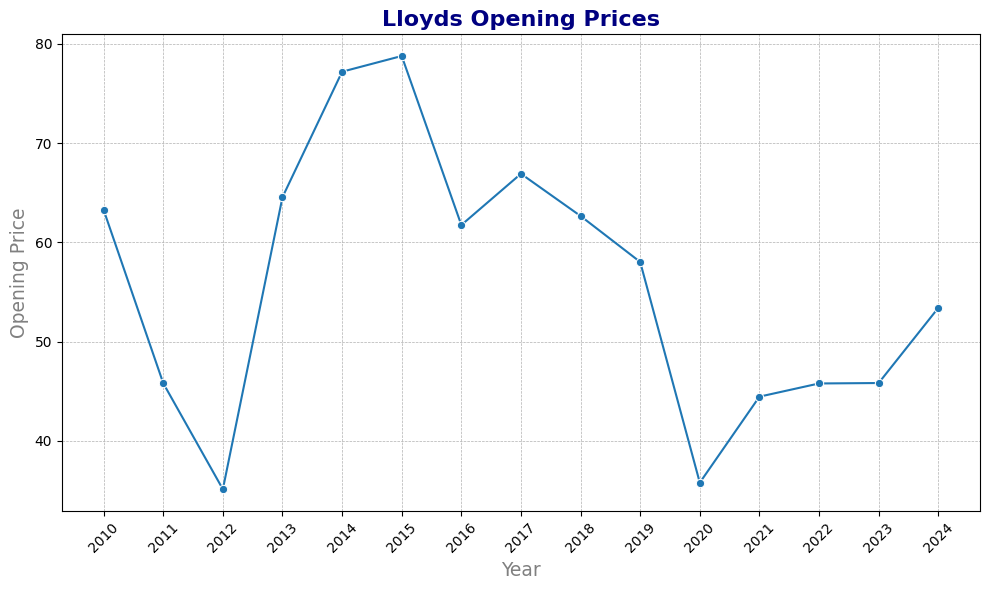

In [7]:
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')
years = data.index.year

plt.figure(figsize=(10, 6))
sns.lineplot(x=years, y=data['Open'].values.ravel(),
             color='#1f77b4', marker='o', errorbar=None)
"""
.values converts this column into a NumPy array.
.ravel() flattens the array to ensure it's one-dimensional,
removing any extra dimensions.
"""
plt.title('Lloyds Opening Prices', fontsize=16, color='navy', weight='bold')
plt.xlabel('Year', fontsize=13.5, color='gray')
plt.ylabel('Opening Price', fontsize=13.5, color='gray')

# Setting the x-ticks
plt.xticks(ticks=range(years.min(), years.max() + 1), rotation=45)
"""
range(years.min(), years.max() + 1) creates a sequence of integers from
the minimum year to the maximum year (inclusive).
"""

plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Closing Price

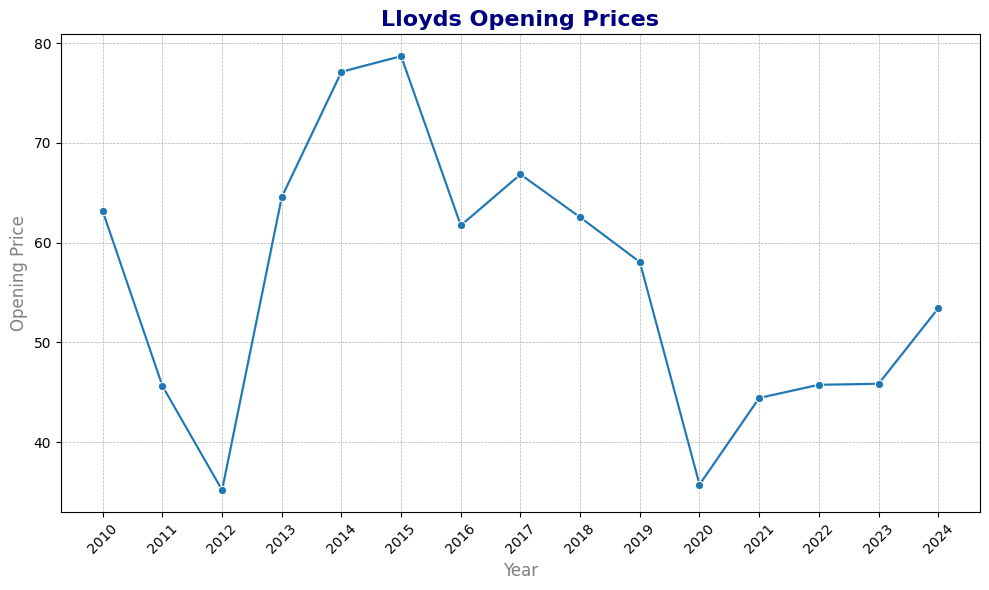

In [8]:
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')
years = data.index.year

plt.figure(figsize=(10, 6))
sns.lineplot(x=years, y=data['Close'].values.ravel(),
             errorbar= ("ci", 0) , color='#1f77b4', marker='o')
plt.title('Lloyds Opening Prices', fontsize=16, color='navy', weight='bold')
plt.xlabel('Year', fontsize=12, color='gray')
plt.ylabel('Opening Price', fontsize=12, color='gray')

# Setting the x-ticks
plt.xticks(ticks=range(years.min(), years.max() + 1), rotation=45)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Graph with 2 moving Average

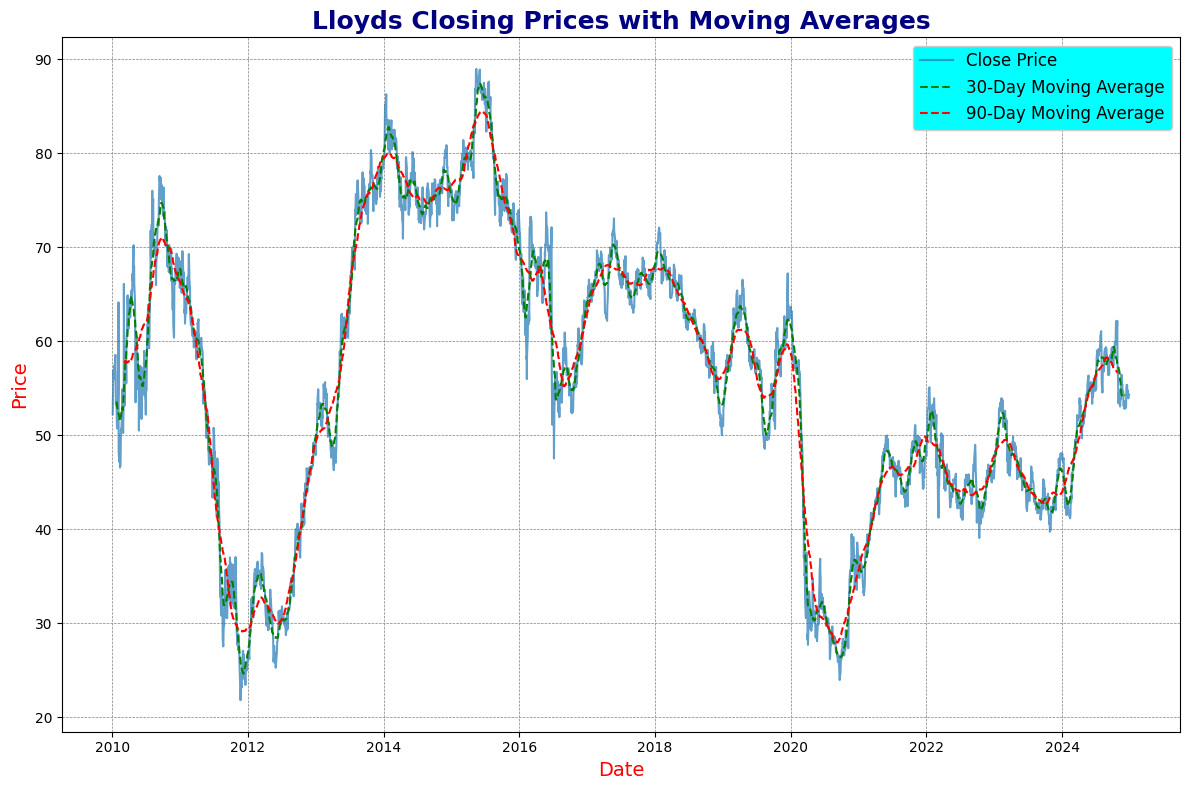

In [9]:
# Ensuring again that time the index is in datetime format
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')

# Calculating 2 different Moving Averages for Closing Prices
data['MA_30'] = data['Close'].rolling(window=30, center=True).mean()
data['MA_90'] = data['Close'].rolling(window=90, center=True).mean()
# 30-day & 90-day moving average

# Plotting the Close Prices along with Moving Averages
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['Close'], label='Close Price', color='#1f77b4',
         alpha=0.7, linewidth=1.5)  # Blue for close price
plt.plot(data.index, data['MA_30'], label='30-Day Moving Average',
         color='green', linestyle='--', linewidth=1.5)  # Orange for MA_30
plt.plot(data.index, data['MA_90'], label='90-Day Moving Average',
         color='red', linestyle='--', linewidth=1.5)  # Green for MA_90

# Adding the labels and title
plt.title('Lloyds Closing Prices with Moving Averages', fontsize=18,
          color='navy', weight='bold')
plt.xlabel('Date', fontsize=14, color='Red')
plt.ylabel('Price', fontsize=14, color='Red')

# Adding a legend with a colored box
legend = plt.legend(frameon=True, loc='upper right', fontsize=12)
frame = legend.get_frame()
frame.set_facecolor('cyan')
frame.set_alpha(1)
# Add grid
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.show()



In [10]:
data.drop(columns=["MA_30", "MA_90"], inplace=True)
# inplace=True modifies the original DataFrame directly,
# rather than creating a new one.
data.head(10)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L
Date,,,,,,
2010-01-04,36.779491,52.259998,52.259998,51.099998,51.400002,167623403
2010-01-05,38.025181,54.029999,54.759998,52.200001,52.500000,233026957
2010-01-06,38.419300,54.590000,55.230000,53.169998,55.000000,142079248
2010-01-07,40.066143,56.930000,57.070000,54.000000,54.860001,216171360
2010-01-08,40.045036,56.900002,57.520000,56.160000,56.990002,178033888
2010-01-11,39.503120,56.130001,57.950001,55.630001,57.799999,169834032
2010-01-12,39.390511,55.970001,56.290001,55.080002,55.590000,189050155
2010-01-13,39.411633,56.000000,56.200001,55.160000,55.639999,117598072


# LSTM Model

##1.1  Building a Model



In [11]:
scaler = MinMaxScaler()
# MinimaxScaler uses for scale data to a range of [0, 1]
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))
# 'values.reshape(-1, 1)' converts into a 2D array with one feature per row

# Preparing the data for LSTM
def create_lstm_dataset(dataset, time_step):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:i + time_step])
        y.append(dataset[i + time_step])
    return np.array(X), np.array(y)

# Defining the time step for sequence
time_step = 1260
X, y = create_lstm_dataset(scaled_data, time_step)

# Spliting data into train and test sets
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build the LSTM model
model = Sequential([
    Bidirectional(LSTM(100, return_sequences=True,
                       input_shape=(time_step, 1))),
    Dropout(0.3),
    BatchNormalization(),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu', kernel_regularizer='l2'),
    Dense(1)
])

"""
# A Sequential model is a linear stack of layers where each layer has exactly
one input and one output.
# Bidirectional: Wraps the LSTM layer to process the input sequence in both
forward and backward directions.
# LSTM(100): A Long Short-Term Memory (LSTM) layer with 100 units (neurons).
It captures temporal dependencies in the data.
# return_sequences=True: LSTM layer returns the full sequence of outputs
for each time step (not just the last one).
# input_shape=(time_step, 1): Specifies the shape of the input
data (time steps and features). 'time_step' is the number of previous time
steps used for prediction, and 1 indicates one feature (e.g., stock price).
# Dropout: is a regularization technique that randomly sets a fraction
(here 30%) of input units to 0 during training to prevent overfitting.

# BatchNormalization(): Normalizes the inputs to the layer, stabilizing
and speeding up training by reducing internal covariate shift.

# Dense layer with 25 units (neurons). Each unit receives input from all
neurons of the previous layer.
# activation='relu': (ReLU) function to introduce non-linearity.
# kernel_regularizer='l2': Applies L2 regularization to the weights, helping
to prevent overfitting by penalizing large weights.
# Final Dense layer with a single unit, typically used for regression tasks
(outputting a single prediction, e.g., predicted stock price).
"""
# Compiling the model
optimizer = Adam(learning_rate=0.001)
"""Adam optimizer is initialized with a learning rate of 0.001, controlling
the step size during optimization.
"""
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

model.build(input_shape=(None, time_step, 1))

# Visualizing the model architecture
plot_model(model, show_shapes=True, show_layer_names=True,
           to_file='lstm_architecture.png')

# Train the model and record history
history = model.fit(
    X_train, y_train,   # Training features and labels.
    validation_data=(X_test, y_test),
    # Validation data for performance evaluation during training.
    epochs=30,          # for 30 iterations over the entire dataset.
    batch_size=32,      # No. samples processed before the model is updated.
    verbose=1           # Displays detailed progress of training for each epoch.
)
"""
history: Stores the training and validation loss/metrics for
each epoch, useful for plotting and analysis later.
"""

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 25s 151ms/step - loss: 0.3343 - mae: 0.1307 - val_loss: 0.3070 - val_mae: 0.3164
Epoch 2/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - loss: 0.1816 - mae: 0.0635 - val_loss: 0.1732 - val_mae: 0.2343
Epoch 3/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 129ms/step - loss: 0.1014 - mae: 0.0574 - val_loss: 0.0973 - val_mae: 0.1741
Epoch 4/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - loss: 0.0547 - mae: 0.0448 - val_loss: 0.0514 - val_mae: 0.1175
Epoch 5/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - loss: 0.0303 - mae: 0.0434 - val_loss: 0.0281 - val_mae: 0.0848
Epoch 6/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - loss: 0.0172 - mae: 0.0397 - val_loss: 0.0138 - val_mae: 0.0549
Epoch 7/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - loss: 0.0114 - mae: 0.0443 - val_loss: 0.0088 - val_mae: 0.0466
Epoch 8/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - loss: 0.0072 - mae: 0.0366 - val_loss: 0.0063 - val_mae: 0.0422
Epoch 9/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/st

'\nhistory: Stores the training and validation loss/metrics for\neach epoch, useful for plotting and analysis later.\n'

##1.2 Forecasting using LSTM Model

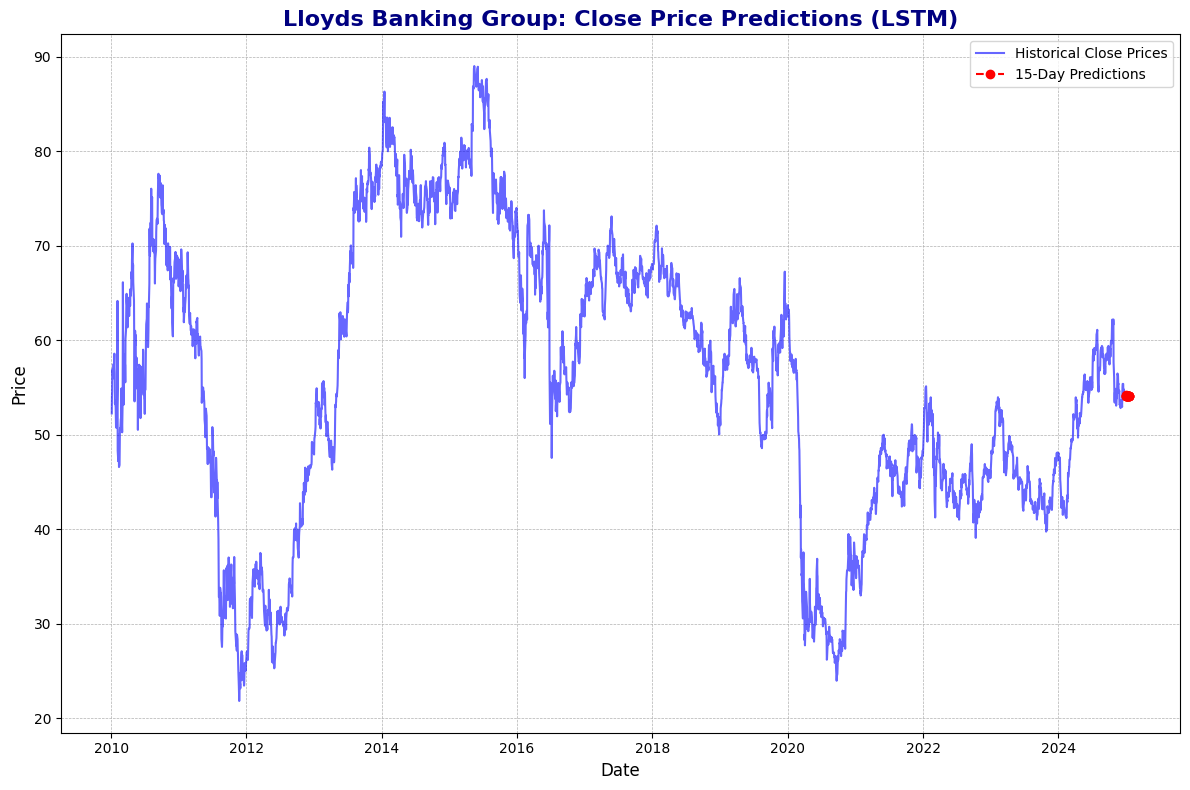

-----------------------------------------------------------------------------------------------------------------------------------------------------------


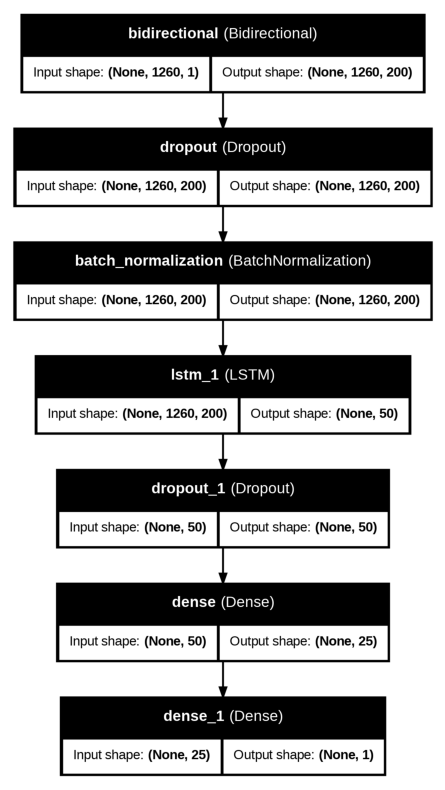

In [12]:
last_sequence = scaled_data[-time_step:]
# Using the last sequence of the training data
future_predictions = []
# Initializing an empty list to store the predicted values for future timesteps.

for _ in range(15):
    prediction = model.predict(last_sequence.reshape(1, time_step, 1),
                               verbose=0)
    # (1, time_step, 1) = (batch_size, time_steps, features)
    future_predictions.append(prediction[0, 0])
    # Saving the prediction for append to new(upcoming) prediction.
    last_sequence = np.append(last_sequence[1:], prediction, axis=0)
    # Updating the last sequence with the new prediction as well

# Inversing scale the predictions back to the original scale in 2D
future_predictions = \
scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Generating future dates starting from the last available date in the dataset
future_dates = pd.date_range(start=data.index[-1], periods=16, freq='B')[1:]
"""
'B' stands for upcoming Business days
"""

# Creating a DataFrame for future predictions
future_df = pd.DataFrame({'Date': future_dates,
                          'Predicted Close': future_predictions.ravel()})

# Plotting the predictions along with historical data
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['Close'], label='Historical Close Prices',
         color='blue', alpha=0.6)
plt.plot(future_df['Date'], future_df['Predicted Close'],
         label='15-Day Predictions', color='red', linestyle='--', marker='o')
plt.title('Lloyds Banking Group: Close Price Predictions (LSTM)', fontsize=16,
          color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='black')
plt.ylabel('Price', fontsize=12, color='black')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('future_predictions.png')
plt.show()


print(155*"-")
# Displaying the LSTM model architecture image
img = mpimg.imread('lstm_architecture.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()


##1.2.1 Forecasted Graph using LSTM Model

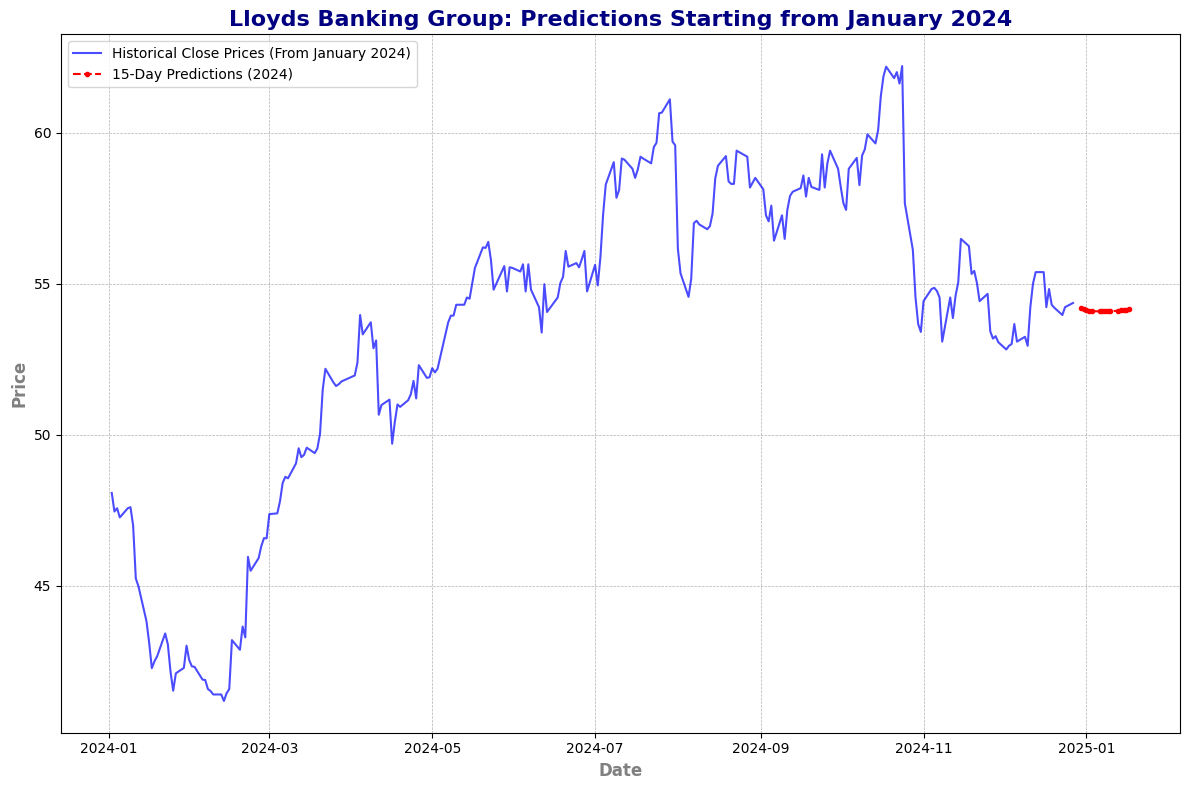

Forecasted Close Prices for the Next 15 Days
         Date  Predicted Close
0  2024-12-30        54.180351
1  2024-12-31        54.148514
2  2025-01-01        54.122177
3  2025-01-02        54.102314
4  2025-01-03        54.088634
5  2025-01-06        54.080502
6  2025-01-07        54.077202
7  2025-01-08        54.078030
8  2025-01-09        54.082317
9  2025-01-10        54.089447
10 2025-01-13        54.098862
11 2025-01-14        54.110077
12 2025-01-15        54.122650
13 2025-01-16        54.136219
14 2025-01-17        54.150482


In [13]:
# Filtering the data starting from January 1, 2024
filtered_data = data[data.index >= '2024-01-01']

# Plotting the subset data with predictions
plt.figure(figsize=(12, 8))
plt.plot(filtered_data.index, filtered_data['Close'],
         label='Historical Close Prices (From January 2024)',
         color='blue', alpha=0.7)
plt.plot(future_df['Date'], future_df['Predicted Close'],
         label='15-Day Predictions (2024)', color='red',
         linestyle='--', marker='.')
plt.title('Lloyds Banking Group: Predictions Starting from January 2024',
          fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray', weight='bold')
plt.ylabel('Price', fontsize=12, color='gray', weight='bold')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

print("Forecasted Close Prices for the Next 15 Days")
print(future_df)


##1.3  Visualization of Evaluation Metrics

###1.3.1 Graph of Training Loos vs Epoch


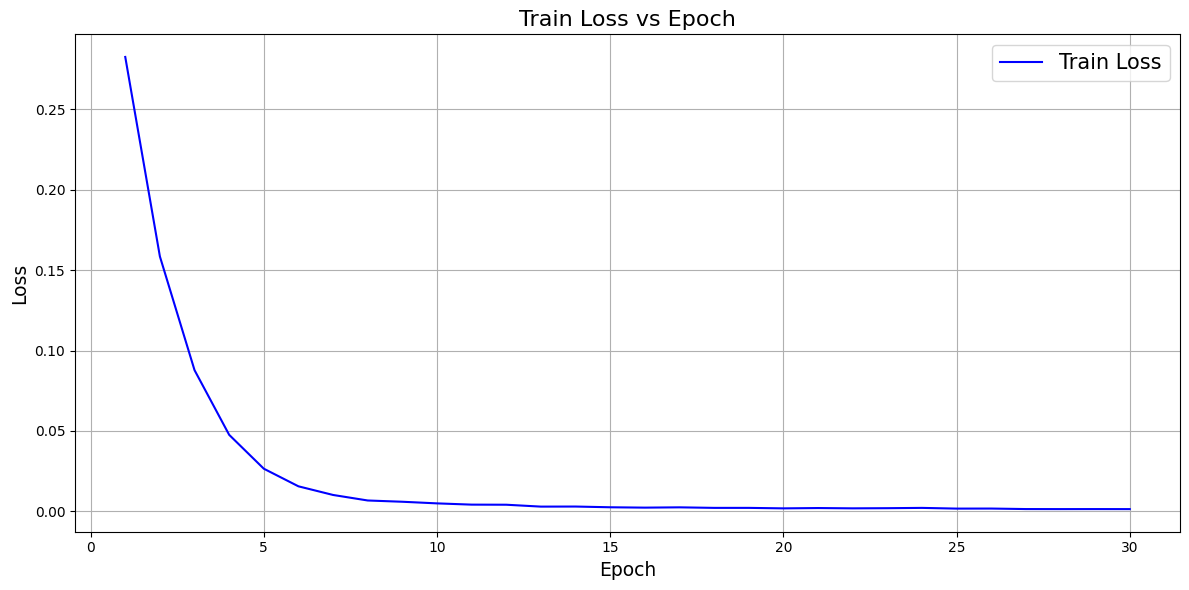

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 31), history.history['loss'],
         label='Train Loss', color='blue')
plt.title('Train Loss vs Epoch', fontsize=16)
plt.xlabel('Epoch', fontsize=13.5)
plt.ylabel('Loss', fontsize=13.5)
plt.legend(loc='upper right', fontsize=15)
plt.grid()
plt.tight_layout()
plt.savefig('Train_loss_vs_epoch.png')
plt.show()

###1.3.2 Graph of Training Mae vs Epoch

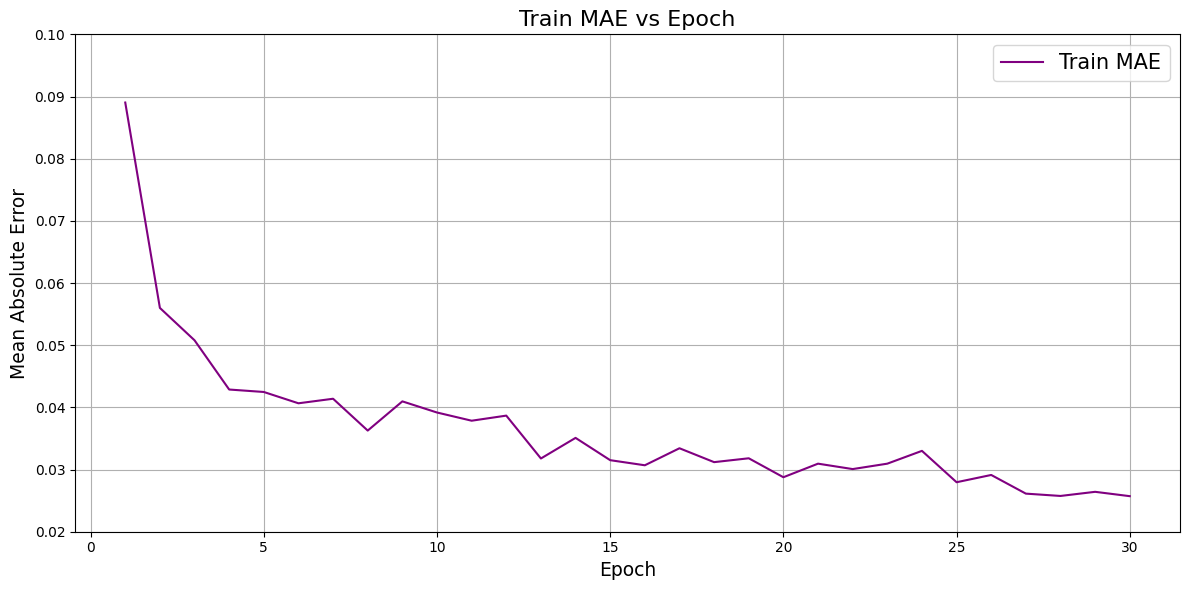

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 31), history.history['mae'],
         label='Train MAE', color='purple')
plt.title('Train MAE vs Epoch', fontsize=16)
plt.xlabel('Epoch', fontsize=13.5)
plt.ylabel('Mean Absolute Error', fontsize=13.5)
plt.legend(fontsize=15)
plt.ylim(0.02, 0.10)
plt.grid()
plt.tight_layout()
plt.savefig('Train_mae_vs_epoch.png')
plt.show()

###1.3.3 Graph of Testing **Loss** vs Epoch

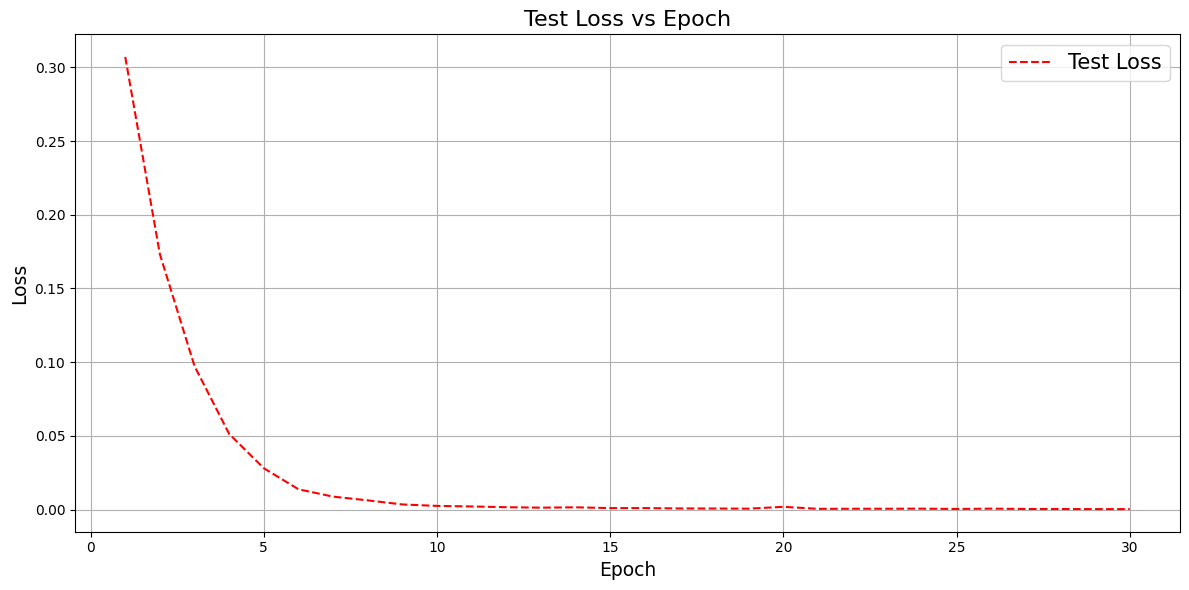

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 31), history.history['val_loss'],
         label='Test Loss', color='red', linestyle='--')
plt.title('Test Loss vs Epoch', fontsize=16)
plt.xlabel('Epoch', fontsize=13.5)
plt.ylabel('Loss', fontsize=13.5)
plt.legend(fontsize=15)
plt.grid()
plt.tight_layout()
plt.savefig('Test_loss_vs_epoch.png')
plt.show()


###1.3.4 Graph of Testing Mae vs Epoch

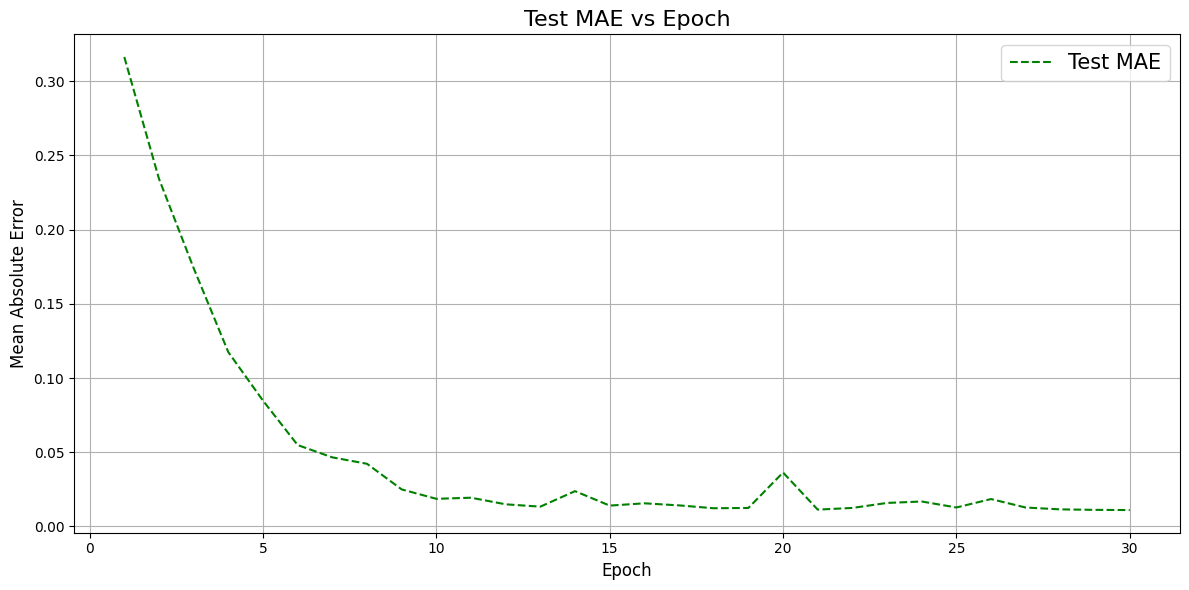

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 31), history.history['val_mae'],
         label='Test MAE', color='green', linestyle='--')
plt.title('Test MAE vs Epoch', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Mean Absolute Error', fontsize=12)
plt.grid()
plt.legend(fontsize=15)
plt.tight_layout()
plt.savefig('Test_mae_vs_epoch.png')
plt.show()

###1.3.5 Evaluation Metrices

In [18]:
# Making predictions on the test set
y_pred = model.predict(X_test)

# Inversing transform the scaled predictions and true values
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)

# Calculating of evaluation metrics
mse = mean_squared_error(y_test_original, y_pred_original)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)
mape = \
np.mean(np.abs((y_test_original - y_pred_original) / y_test_original)) * 100

# Print the evaluation metrics
print("Test Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
Test Evaluation Metrics:
Mean Squared Error (MSE): 0.9735
Root Mean Squared Error (RMSE): 0.9867
Mean Absolute Error (MAE): 0.7421
R-squared (R²): 0.9716
Mean Absolute Percentage Error (MAPE): 1.53%


#SARIMA Model

##2.1  Building a Model


In [19]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 72.6 MB/s eta 0:00:00


Searching for best ARIMA/SARIMA parameters...
ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC: 41445.8388920961


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC: 36430.84860589064


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC: 20259.12076663104


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC: 20185.55859988863


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC: 20263.035657203407


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC: 20258.43952800856


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC: 20195.15708739937


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC: 20187.270974008967


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC: 36294.252608607276


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC: 31424.76785440753


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC: 17114.5278053377


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC: 16930.442313361076


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC: 17122.40725750941


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC: 17050.547301442337


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC: 16922.088708967345


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC: 16897.861217894984


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 2)x(0, 0, 0, 12) - AIC: 31719.917845351163


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 2)x(0, 0, 1, 12) - AIC: 27441.593625607587


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 2)x(0, 1, 0, 12) - AIC: 15813.605426135846


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 2)x(0, 1, 1, 12) - AIC: 15403.474238208919


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 2)x(1, 0, 0, 12) - AIC: 15824.705732634578


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di

ARIMA(0, 0, 2)x(1, 0, 1, 12) - AIC: 15927.79485061434
ARIMA(0, 0, 2)x(1, 1, 0, 12) - AIC: 15424.722010936452


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 2)x(1, 1, 1, 12) - AIC: 15407.379494193312
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC: 11765.007470268998


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC: 11721.461528681557
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC: 14283.641365356796


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC: 11619.505135657027
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC: 11731.608146354189


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC: 11623.344048349933


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC: 12989.597372094315


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC: 11621.505614640728
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC: 11760.704019801744


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC: 11717.632746397985
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC: 14281.415367462701


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC: 11624.356775963144


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC: 11729.761308750323


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC: 11625.151525078976


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC: 12991.546621582842


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC: 11626.357178473876
ARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC: 11739.731218230305


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC: 11699.596151897877


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 2)x(0, 1, 0, 12) - AIC: 14261.062235048179


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 2)x(0, 1, 1, 12) - AIC: 11602.031502426145


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC: 11714.575333123492


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC: 11607.953048549964


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 2)x(1, 1, 0, 12) - AIC: 12978.56479411051


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 2)x(1, 1, 1, 12) - AIC: 11604.032474197838


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC: 11771.1654139495


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC: 11732.957641608024


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC: 14098.249979496566


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC: 11618.42947707042


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC: 11733.191659513643


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC: 11637.552481304016


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC: 12876.09529199007


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC: 11620.430217723062
ARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC: 11764.735836945423


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC: 11721.47236843932


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC: 14084.388538686471


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC: 11623.50933247187


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC: 11731.37071955936


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC: 11629.389400799568


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC: 12875.008591699858


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC: 11625.509989633782


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 2)x(0, 0, 0, 12) - AIC: 11747.719276449858


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 2)x(0, 0, 1, 12) - AIC: 11703.767934362098


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 2)x(0, 1, 0, 12) - AIC: 14083.233356109922


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 2)x(0, 1, 1, 12) - AIC: 11602.487021962075


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 2)x(1, 0, 0, 12) - AIC: 11716.237256353557


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 2)x(1, 0, 1, 12) - AIC: 11615.191348761922


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 2)x(1, 1, 0, 12) - AIC: 12873.40013184447


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 2)x(1, 1, 1, 12) - AIC: 11604.487741753794
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC: 11763.614379932858


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC: 11720.16050188661
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC: 14284.424029154368


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC: 11621.50162176269


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC: 11720.231512671828


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC: 11627.9816890913


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC: 12989.0154244714


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC: 11623.392474348551


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC: 11749.56492925845


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC: 11706.751130788885


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC: 14098.728174568321


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC: 11614.87865501584


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC: 11710.635586312506


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC: 11615.881583799808


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC: 12883.898700361182


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC: 11616.879106191773


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC: 11741.626546054133


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC: 11701.506043355559


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 2)x(0, 1, 0, 12) - AIC: 14092.425170465875


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 2)x(0, 1, 1, 12) - AIC: 11604.029869185491


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC: 11706.356966540086


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC: 11609.479430496367


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 2)x(1, 1, 0, 12) - AIC: 12974.24619182842


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 2)x(1, 1, 1, 12) - AIC: 11606.030321427004


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 0)x(0, 0, 0, 12) - AIC: 11765.271590289916


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 0)x(0, 0, 1, 12) - AIC: 11731.766726093934


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 0)x(0, 1, 0, 12) - AIC: 14084.495606882963


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 0)x(0, 1, 1, 12) - AIC: 11620.426148784178


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 0)x(1, 0, 0, 12) - AIC: 11721.890058499364


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 0)x(1, 0, 1, 12) - AIC: 11629.75463514229


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 0)x(1, 1, 0, 12) - AIC: 12872.493814287996


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(1, 1, 1, 12) - AIC: 11625.559486628752


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 1)x(0, 0, 0, 12) - AIC: 11755.300185034652


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 1)x(0, 0, 1, 12) - AIC: 11714.142349677379


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 1)x(0, 1, 0, 12) - AIC: 13930.830499859


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 1)x(0, 1, 1, 12) - AIC: 11617.54238753136


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 1)x(1, 0, 0, 12) - AIC: 11714.007807139167


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 1)x(1, 0, 1, 12) - AIC: 11622.760299755775


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 1)x(1, 1, 0, 12) - AIC: 12872.190093572402


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 1)x(1, 1, 1, 12) - AIC: 11619.54357542301


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2)x(0, 0, 0, 12) - AIC: 11749.685039398631


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2)x(0, 0, 1, 12) - AIC: 11705.77146207658


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2)x(0, 1, 0, 12) - AIC: 14085.640339436608


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2)x(0, 1, 1, 12) - AIC: 11604.48701487637


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2)x(1, 0, 0, 12) - AIC: 11707.96502298085


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2)x(1, 0, 1, 12) - AIC: 11617.154108235542


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2)x(1, 1, 0, 12) - AIC: 12872.697821360645


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2)x(1, 1, 1, 12) - AIC: 11606.982891640755
ARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC: 11747.427292607517


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC: 11705.314748940395
ARIMA(2, 1, 0)x(0, 1, 0, 12) - AIC: 14269.46226636957


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 0)x(0, 1, 1, 12) - AIC: 11608.840424144957


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC: 11703.332219717915


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC: 11614.557050676382


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 0)x(1, 1, 0, 12) - AIC: 12974.1354711174


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 0)x(1, 1, 1, 12) - AIC: 11608.0165975182


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC: 11747.85588950352


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC: 11704.269516003791


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 1)x(0, 1, 0, 12) - AIC: 14095.834142665099


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 1)x(0, 1, 1, 12) - AIC: 11607.993529227308


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC: 11704.42349248658


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC: 11615.33177474327


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 1)x(1, 1, 0, 12) - AIC: 12971.593251913504


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC: 11609.992441026812


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC: 11742.588611405728


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC: 11702.03865981584


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 2)x(0, 1, 0, 12) - AIC: 14092.741042739115


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 2)x(0, 1, 1, 12) - AIC: 11604.597104554268


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC: 11704.209717318678


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC: 11611.463163730496


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(1, 1, 0, 12) - AIC: 12792.132585397345


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC: 11607.820639332493

Best ARIMA/SARIMA Model Found:
Order: (0, 1, 2),  Seasonal Order: (0, 1, 1, 12) with AIC: 11602.031502426145


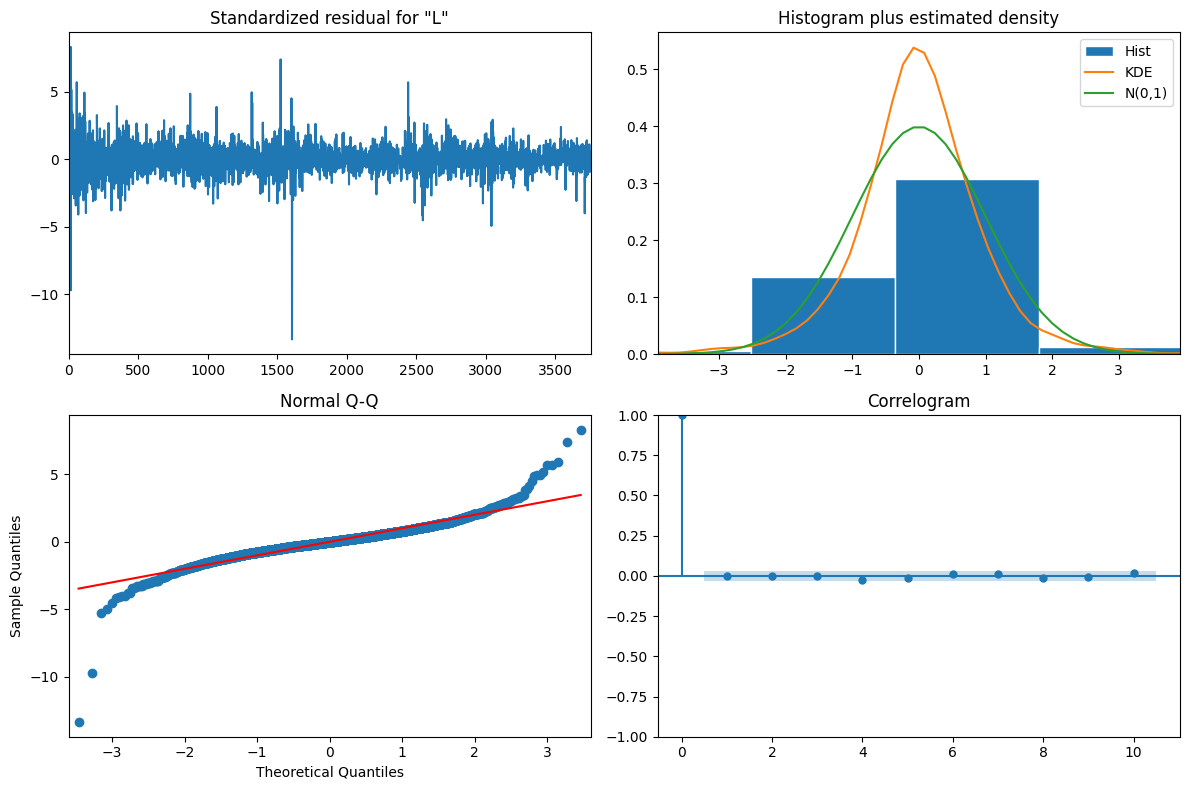

In [20]:
# Making a datacopy bulid a model(to keep original data unaffected)
data1 = data.copy()
close_prices = data1['Close']

# Building model with parameters
p = q = range(0, 3)
d = range(0, 2)
# p stands for The number of lag observations in the model (AR component)
# d stands for The degree of differencing (to make the series stationary)
# q stands for The size of the moving average window (MA component)
pdq = list(itertools.product(p, d, q))
# itertools.product Generate all combinations of p, d, q
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in itertools.product(range(0, 2),
                                                                  range(0, 2),
                                                                  range(0, 2))]

min_aic = float('inf')     # start with high AIC value
# In order to store best order
best_order = None
best_seasonal_order = None
best_model = None

print("Searching for best ARIMA/SARIMA parameters...")
for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = SARIMAX(close_prices, order=param,
                            seasonal_order=seasonal_param,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            results = model.fit(disp=False)
            if results.aic < min_aic:
                min_aic = results.aic
                best_order = param
                best_seasonal_order = seasonal_param
                best_model = results
            print(f"ARIMA{param}x{seasonal_param} - AIC: {results.aic}")
        except Exception as e:
          # Ignoring errors (e.g., parameter combinations that don't converge)
            continue

print("\nBest ARIMA/SARIMA Model Found:")
print(f"Order: {best_order}, \
 Seasonal Order: {best_seasonal_order} with AIC: {min_aic}")

# Step 5: Residual Diagnostics
best_model.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

## 2.2 Model Summary & Visualization


Model Summary:
                                      SARIMAX Results                                       
Dep. Variable:                               LLOY.L   No. Observations:                 3784
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -5797.016
Date:                              Sun, 29 Dec 2024   AIC                          11602.032
Time:                                      01:08:39   BIC                          11626.956
Sample:                                           0   HQIC                         11610.895
                                             - 3784                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0104      0.008     -1.327      0.185      -0.026       0.005
ma.

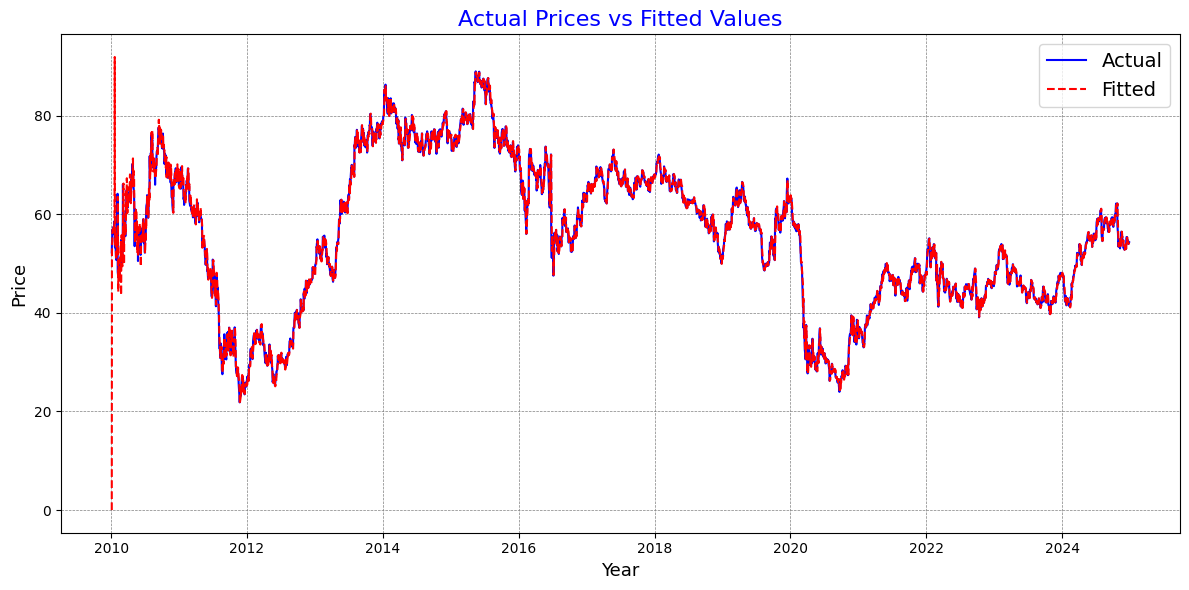

In [21]:
# Display the statistical summary of the fitted model
print("\nModel Summary:")
print(best_model.summary())

print("\n")
print(155*"-")
print("\nPlotting Actual vs Fitted values...\n")
plt.figure(figsize=(12, 6))
plt.plot(close_prices, label='Actual', color='blue')
plt.plot(best_model.fittedvalues, label='Fitted', color='red', linestyle='--')
plt.title("Actual Prices vs Fitted Values", color='b', fontsize=16)
plt.xlabel("Year", fontsize=13, color='k')
plt.ylabel("Price", fontsize=13, color='k')
plt.legend(fontsize = 14)
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.tight_layout()
plt.show()


## 2.3 Forecasting using ARIMA Model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


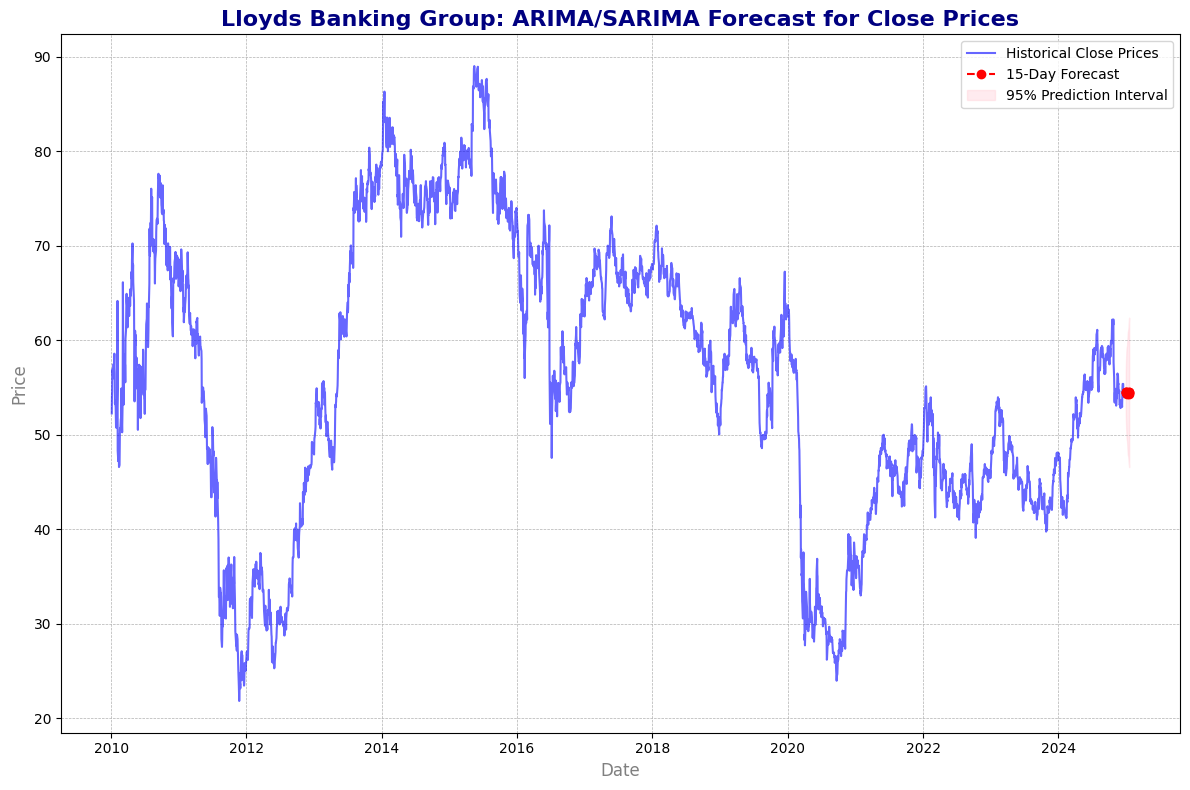

In [22]:
# Generating a 15-day forecast using the best SARIMA model
forecast = best_model.get_forecast(steps=15)
forecast_values = forecast.predicted_mean
 # Extracting the forecasted values (predictions)
forecast_conf_int = forecast.conf_int()  # Confidence intervals for the forecast

future_dates = pd.date_range(start=close_prices.index[-1],
                             periods=16, freq='B')[1:]

# Creating a DataFrame for the forecasted values
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecasted Close': forecast_values,
    'Lower Bound': forecast_conf_int.iloc[:, 0],
    'Upper Bound': forecast_conf_int.iloc[:, 1]
    # bound of 95 % confidence interval
})

# Plotting the Historical Data and Forecast
plt.figure(figsize=(12, 8))
plt.plot(close_prices.index, close_prices, label='Historical Close Prices',
         color='blue', alpha=0.6)
plt.plot(forecast_df['Date'], forecast_df['Forecasted Close'],
         label='15-Day Forecast', color='red', linestyle='--', marker='o')
plt.fill_between(forecast_df['Date'], forecast_df['Lower Bound'],
                 forecast_df['Upper Bound'], color='pink', alpha=0.3,
                 label='95% Prediction Interval')
plt.title('Lloyds Banking Group: ARIMA/SARIMA Forecast for Close Prices',
          fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


##2.3.1 Forecasted Graph using SARIMA Model

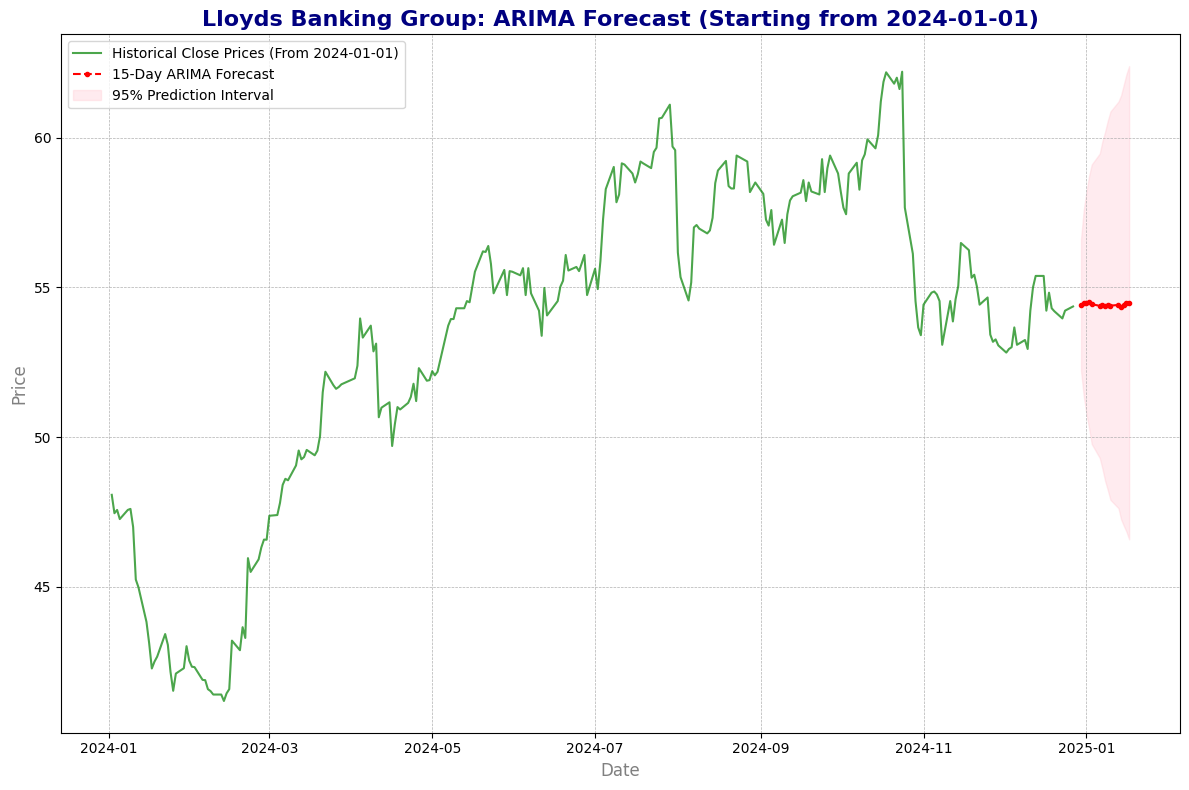

Forecasted Close Prices for the Next 15 Days of 2024:
           Date  Forecasted Close  Lower Bound  Upper Bound
3784 2024-12-30         54.412777    52.206001    56.619552
3785 2024-12-31         54.472803    51.368112    57.577495
3786 2025-01-01         54.480526    50.780534    58.180519
3787 2025-01-02         54.505160    50.293180    58.717140
3788 2025-01-03         54.434198    49.766050    59.102347
3789 2025-01-06         54.382839    49.299293    59.466386
3790 2025-01-07         54.411533    48.944058    59.879007
3791 2025-01-08         54.364569    48.538411    60.190727
3792 2025-01-09         54.395638    48.231634    60.559642
3793 2025-01-10         54.386589    47.902317    60.870861
3794 2025-01-13         54.412195    47.622746    61.201645
3795 2025-01-14         54.329711    47.248225    61.411196
3796 2025-01-15         54.402005    47.036581    61.767430
3797 2025-01-16         54.477820    46.839038    62.116601
3798 2025-01-17         54.485543    46.583106

In [23]:
# Filtering the historical data from 2024-01-01 onward
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')
filtered_data = data[data.index >= '2024-01-01']

# Plotting the data from 2024-01-01 with forecast
plt.figure(figsize=(12, 8))
plt.plot(filtered_data.index, filtered_data['Close'],
         label='Historical Close Prices (From 2024-01-01)',
         color='green', alpha=0.7)
plt.plot(forecast_df['Date'], forecast_df['Forecasted Close'],
         label='15-Day ARIMA Forecast', color='red', linestyle='--', marker='.')
plt.fill_between(forecast_df['Date'], forecast_df['Lower Bound'],
                 forecast_df['Upper Bound'], color='pink', alpha=0.3,
                 label='95% Prediction Interval')
plt.title('Lloyds Banking Group: ARIMA Forecast (Starting from 2024-01-01)',
          fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Display the forecasted values
print("Forecasted Close Prices for the Next 15 Days of 2024:")
print(forecast_df)


## 2.4 Evaluation Metrices

In [24]:
y_true = close_prices[-15:]  # Extract the values for the last 15 observations
y_forecasted = best_model.predict(start=len(close_prices) - 15,
                                  end = len(close_prices) - 1)

# Calculate evaluation metrics
mse = mean_squared_error(y_true, y_forecasted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_forecasted)
mape = np.mean(np.abs((y_true - y_forecasted) / y_true)) * 100
r2 = r2_score(y_true, y_forecasted)

# Printing evaluation metrics
print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")


Model Evaluation Metrics:
Mean Squared Error (MSE): 0.3585
Root Mean Squared Error (RMSE): 0.5987
Mean Absolute Error (MAE): 0.5053
Mean Absolute Percentage Error (MAPE): nan%
R-squared (R²): 0.3244


# Prophet

In [25]:
data.head(10)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L
Date,,,,,,
2010-01-04,36.779491,52.259998,52.259998,51.099998,51.400002,167623403
2010-01-05,38.025181,54.029999,54.759998,52.200001,52.500000,233026957
2010-01-06,38.419300,54.590000,55.230000,53.169998,55.000000,142079248
2010-01-07,40.066143,56.930000,57.070000,54.000000,54.860001,216171360
2010-01-08,40.045036,56.900002,57.520000,56.160000,56.990002,178033888
2010-01-11,39.503120,56.130001,57.950001,55.630001,57.799999,169834032
2010-01-12,39.390511,55.970001,56.290001,55.080002,55.590000,189050155
2010-01-13,39.411633,56.000000,56.200001,55.160000,55.639999,117598072


In [26]:
# If 'Date' is the index, reset it to make it a regular column to make ds & y
if 'Date' not in data.columns:
    data.reset_index(inplace=True)

# Selecting only 'Date' and 'Close' columns
data_for_prophet = data[['Date', 'Close']].copy()

# Rename the columns for Prophet (as per our requirement)
data_for_prophet.columns = ['ds', 'y']

# Droping rows with NaN values (if any)
data_for_prophet.dropna(subset=['ds', 'y'], inplace=True)

# Ensuring that 'y' is numeric
data_for_prophet['y'] = pd.to_numeric(data_for_prophet['y'], errors='coerce')
data_for_prophet.dropna(subset=['y'], inplace=True)

# Converting 'ds' column to datetime with the correct format
data_for_prophet['ds'] = pd.to_datetime(data_for_prophet['ds'],
                                        format='%d-%m-%Y')

# Display the prepared data
print(data_for_prophet.head(10))

          ds          y
0 2010-01-04  52.259998
1 2010-01-05  54.029999
2 2010-01-06  54.590000
3 2010-01-07  56.930000
4 2010-01-08  56.900002
5 2010-01-11  56.130001
6 2010-01-12  55.970001
7 2010-01-13  56.000000
8 2010-01-14  57.500000
9 2010-01-15  56.779999


## 3.1 Building a Model

In [27]:
# Defining and customizing the Prophet model
prophet_model = Prophet(
    growth="linear",
    #"linear" for a straight-line trend or "logistic" for a capped growth trend.
    seasonality_mode="multiplicative",
    # most common in financial data like stock prices,
    # Different seasonality
    yearly_seasonality=False,
    weekly_seasonality=1,
    daily_seasonality=1,
    changepoint_prior_scale=0.5,
    # Controls the model's flexibility in detecting trend changes.
    seasonality_prior_scale=120,
    # higher values allow more variation flexibility of seasonal components
    interval_width=0.95
    # prediction interval width to 95% for uncertainty estimates in forecasts.
)


prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
"""
period=30.5: Specifies the duration of the cycle (e.g., monthly).
fourier_order=5: Controls the flexibility of the seasonality model in
capturing detailed patterns within the cycle.
"""
prophet_model.add_seasonality(name='quarterly', period=91.25, fourier_order=8)

# Adding holiday effects for the UK
prophet_model.add_country_holidays(country_name='UK')

# Fitting the model
prophet_model.fit(data_for_prophet)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpbhjxsgep/qrull1mq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbhjxsgep/4lee3a17.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84840', 'data', 'file=/tmp/tmpbhjxsgep/qrull1mq.json', 'init=/tmp/tmpbhjxsgep/4lee3a17.json', 'output', 'file=/tmp/tmpbhjxsgep/prophet_model43i80e8i/prophet_model-20241229010842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:08:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:08:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## 3.2 Forecasting using Prophet Model



In [28]:
# Forecasting for the next 15 business days
future = prophet_model.make_future_dataframe(periods=15, freq='B')
forecast = prophet_model.predict(future)

# Extracting the forecasted values
forecasted_values = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Filtering the  future predictions (next 15 days)
future_predictions = forecasted_values[forecasted_values['ds'] > data_for_prophet['ds'].max()]
print(future_predictions)

             ds       yhat  yhat_lower  yhat_upper
3784 2024-12-30  52.760958   45.079877   60.038181
3785 2024-12-31  52.740467   45.349843   60.626896
3786 2025-01-01  52.657551   45.333771   60.182064
3787 2025-01-02  52.514108   44.332625   60.184191
3788 2025-01-03  52.390474   44.775326   59.870802
3789 2025-01-06  52.802988   45.306140   60.868340
3790 2025-01-07  53.009278   45.243662   60.618332
3791 2025-01-08  53.081700   45.531926   60.592448
3792 2025-01-09  53.042290   44.958974   60.735899
3793 2025-01-10  52.998978   45.329864   60.305181
3794 2025-01-13  53.357493   45.451426   60.301492
3795 2025-01-14  53.429187   44.885453   61.034378
3796 2025-01-15  53.384405   45.716766   61.395868
3797 2025-01-16  53.285176   45.462303   60.681174
3798 2025-01-17  53.228607   45.478630   61.365063


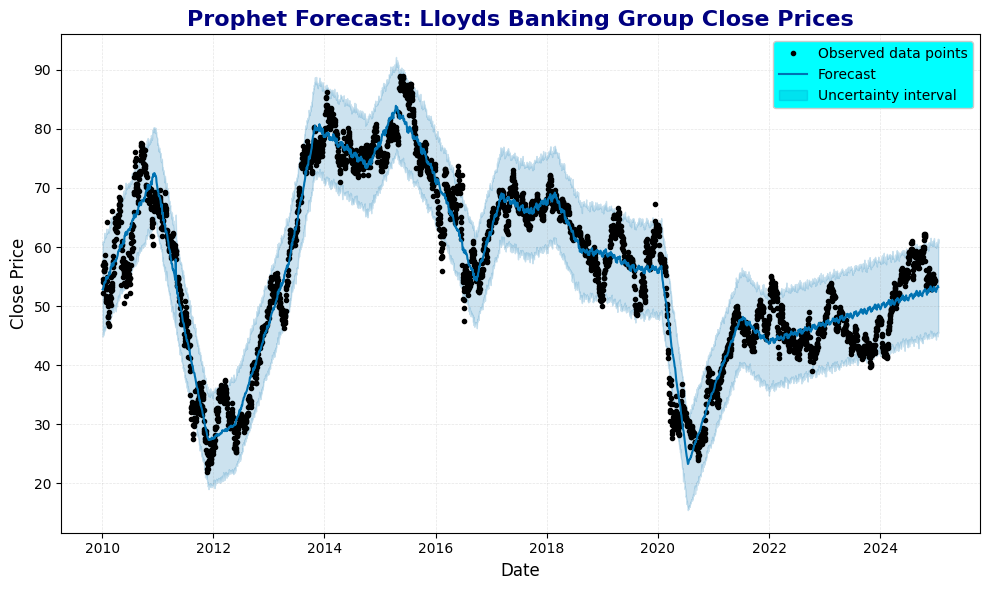

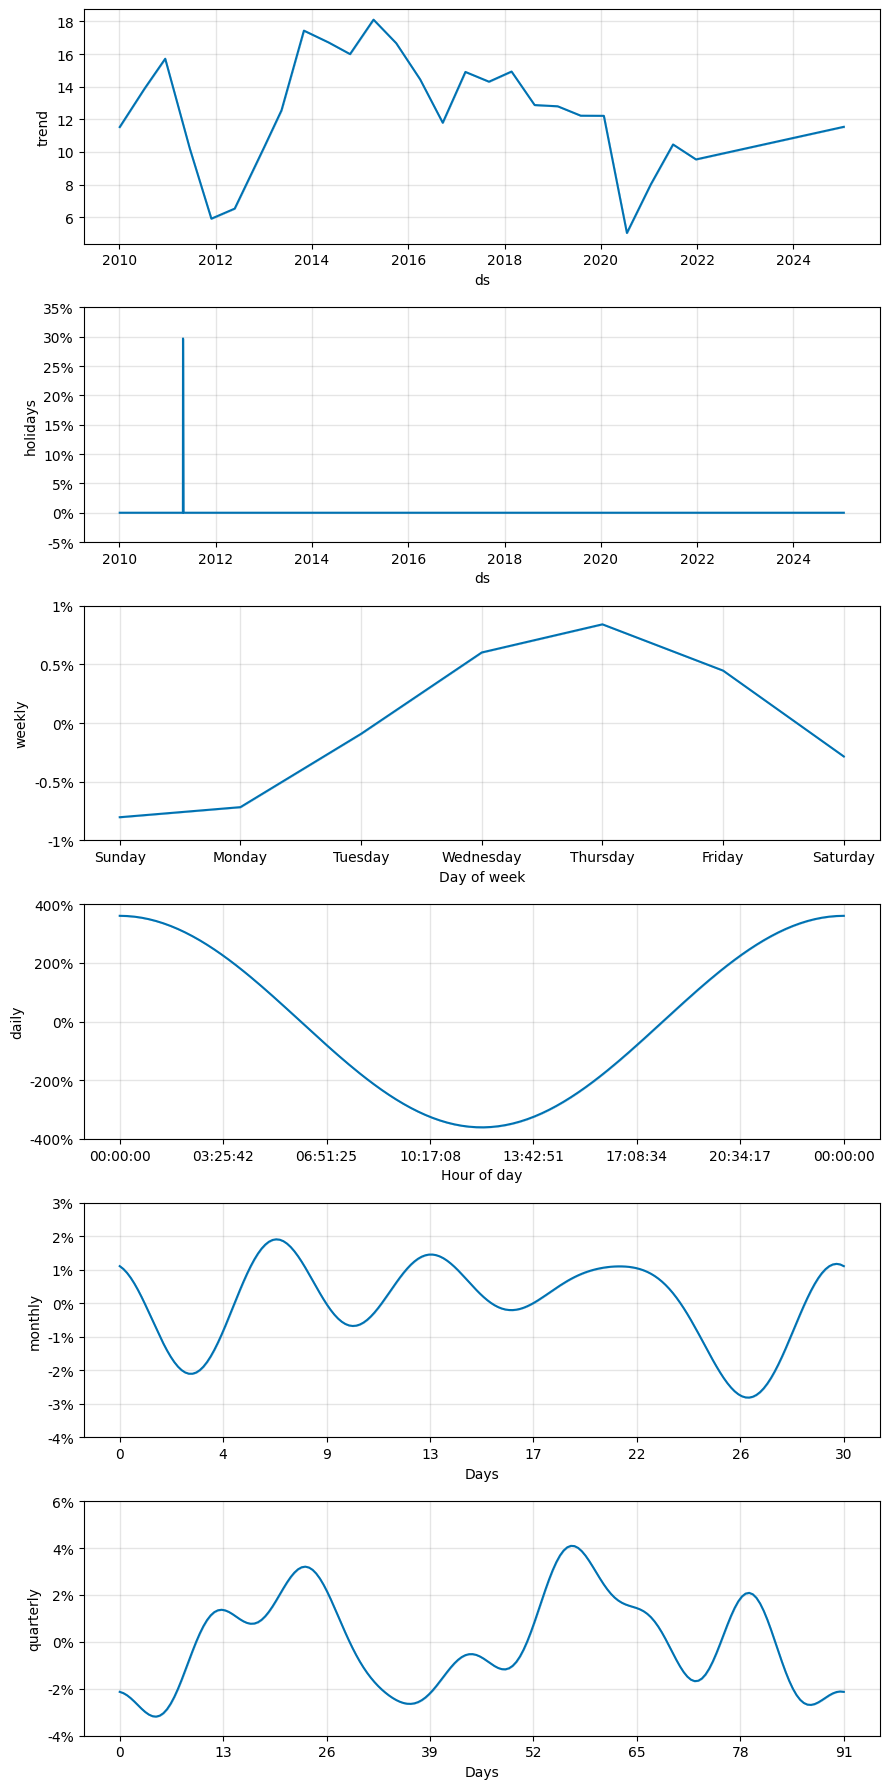

***********************************************************************************************************************************************************


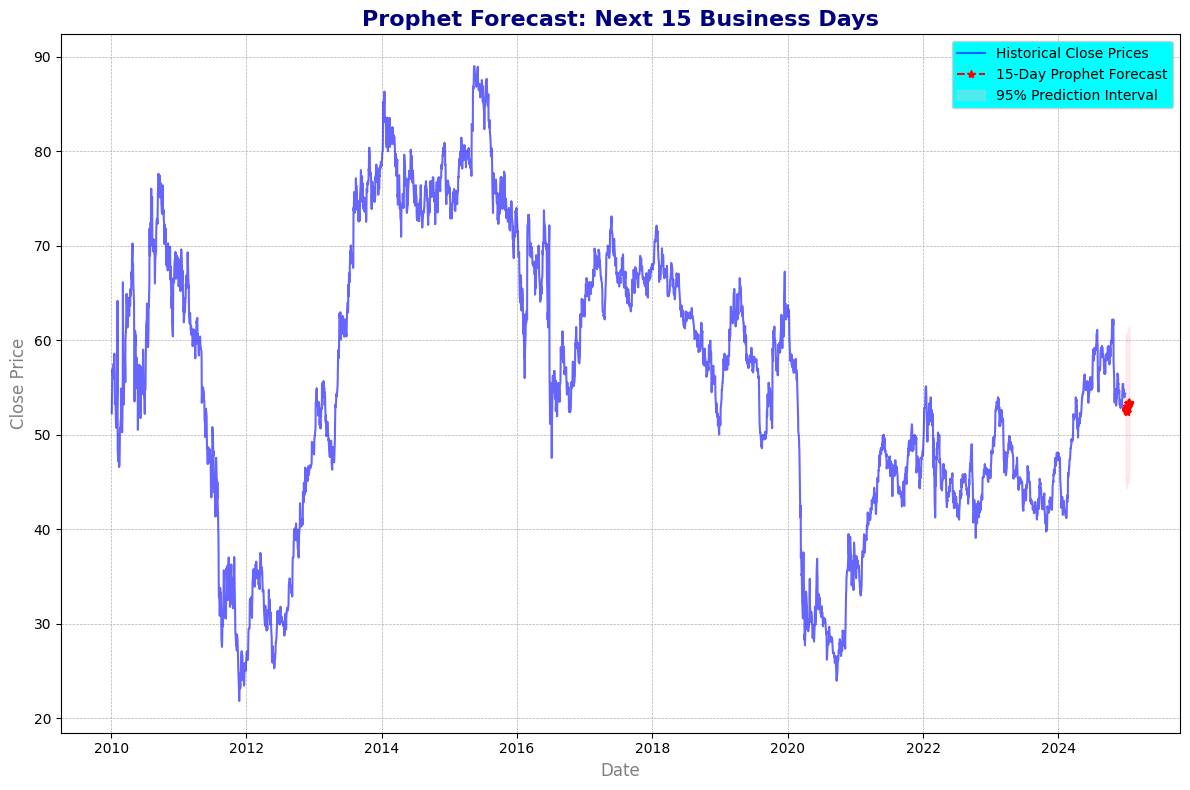

In [29]:
# Plotting the  historical data and forecast data
prophet_model.plot(forecast)
plt.title('Prophet Forecast: Lloyds Banking Group Close Prices',
          fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='k')
plt.ylabel('Close Price', fontsize=12, color='k')
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()

legend = plt.legend(frameon=True, loc='upper right', fontsize=10)
frame = legend.get_frame()
frame.set_facecolor('cyan')
frame.set_alpha(1)

plt.show()

# Component plots
print("\n")
prophet_model.plot_components(forecast)
plt.tight_layout()
plt.show()

# Plotting future predictions only
print(155*"*")
plt.figure(figsize=(12, 8))
plt.plot(data_for_prophet['ds'], data_for_prophet['y'],
         label='Historical Close Prices', color='blue', alpha=0.6)
plt.plot(future_predictions['ds'], future_predictions['yhat'], color='red',
         label='15-Day Prophet Forecast', linestyle='--', marker='*')
plt.fill_between(future_predictions['ds'],
                 future_predictions['yhat_lower'],
                 future_predictions['yhat_upper'],
                 color='pink', alpha=0.3, label='95% Prediction Interval')
plt.title('Prophet Forecast: Next 15 Business Days', fontsize=16, color='navy',
          weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Close Price', fontsize=12, color='gray')
legend = plt.legend(frameon=True, loc='upper right', fontsize=10)
frame = legend.get_frame()
frame.set_facecolor('cyan')
frame.set_alpha(1)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

##3.2.1 Forecasted Graph using Prophet Model

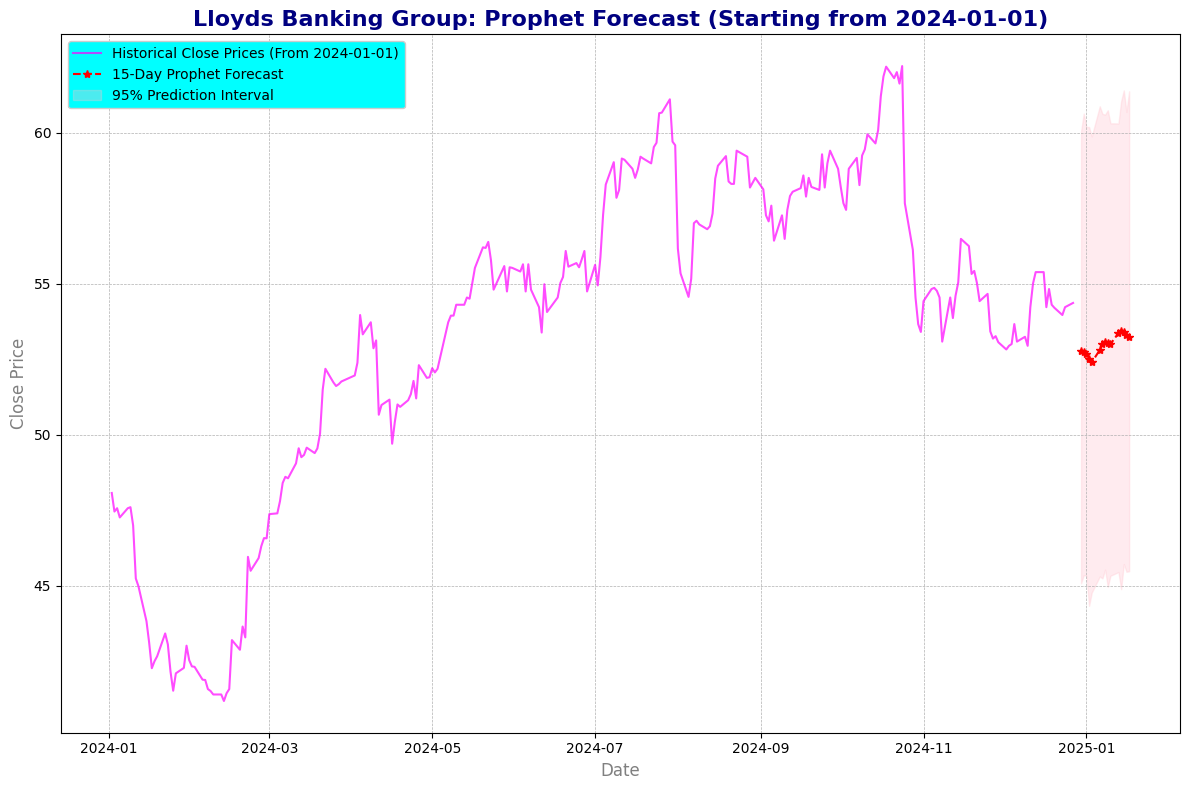

Forecasted Close Prices for the Next 15 Business Days:
             ds       yhat  yhat_lower  yhat_upper
3784 2024-12-30  52.760958   45.079877   60.038181
3785 2024-12-31  52.740467   45.349843   60.626896
3786 2025-01-01  52.657551   45.333771   60.182064
3787 2025-01-02  52.514108   44.332625   60.184191
3788 2025-01-03  52.390474   44.775326   59.870802
3789 2025-01-06  52.802988   45.306140   60.868340
3790 2025-01-07  53.009278   45.243662   60.618332
3791 2025-01-08  53.081700   45.531926   60.592448
3792 2025-01-09  53.042290   44.958974   60.735899
3793 2025-01-10  52.998978   45.329864   60.305181
3794 2025-01-13  53.357493   45.451426   60.301492
3795 2025-01-14  53.429187   44.885453   61.034378
3796 2025-01-15  53.384405   45.716766   61.395868
3797 2025-01-16  53.285176   45.462303   60.681174
3798 2025-01-17  53.228607   45.478630   61.365063


In [30]:
# Ensure the 'ds' column is in datetime format
data_for_prophet['ds'] = pd.to_datetime(data_for_prophet['ds'])

# Filter the historical data from 2024-01-01 onward
filtered_data_prophet = data_for_prophet[data_for_prophet['ds'] >= '2024-01-01']

# Plot data from 2024-01-01 with forecast
plt.figure(figsize=(12, 8))
plt.plot(filtered_data_prophet['ds'], filtered_data_prophet['y'], alpha=0.7,
         label='Historical Close Prices (From 2024-01-01)', color='magenta')
plt.plot(future_predictions['ds'], future_predictions['yhat'], color='red',
         label='15-Day Prophet Forecast', linestyle='--', marker='*')
plt.fill_between(future_predictions['ds'],
                 future_predictions['yhat_lower'],
                 future_predictions['yhat_upper'],
                 color='pink', alpha=0.3, label='95% Prediction Interval')
plt.title('Lloyds Banking Group: Prophet Forecast (Starting from 2024-01-01)',
          fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Close Price', fontsize=12, color='gray')
legend = plt.legend(frameon=True, loc='upper left', fontsize=10)
frame = legend.get_frame()
frame.set_facecolor('cyan')
frame.set_alpha(1)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Display the forecasted values
print("Forecasted Close Prices for the Next 15 Business Days:")
print(future_predictions)


## 3.3 Evaluation Metrices

In [31]:
# Calculating different errors
# Only include predictions corresponding to historical data for accu. evaluation
historical_forecast = forecast[forecast['ds'] <= data_for_prophet['ds'].max()]

rmse = np.sqrt(mean_squared_error(data_for_prophet['y'],
                                  historical_forecast['yhat']))
mse = mean_squared_error(data_for_prophet['y'], historical_forecast['yhat'])
mae = mean_absolute_error(data_for_prophet['y'], historical_forecast['yhat'])
r2 = r2_score(data_for_prophet['y'], historical_forecast['yhat'])
mape = np.mean(
np.abs((data_for_prophet['y'] - historical_forecast['yhat']) \
       / data_for_prophet['y'])
) * 100

# Printing evaluation metrics
print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")


Model Evaluation Metrics:
Mean Squared Error (MSE): 15.7240
Root Mean Squared Error (RMSE): 3.9653
Mean Absolute Error (MAE): 3.1111
Mean Absolute Percentage Error (MAPE): 6.23%
R-squared (R²): 0.9290


# HOLT - WINTERS Model

In [32]:
data.head(10)

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L
0,2010-01-04,36.779491,52.259998,52.259998,51.099998,51.400002,167623403
1,2010-01-05,38.025181,54.029999,54.759998,52.200001,52.500000,233026957
2,2010-01-06,38.419300,54.590000,55.230000,53.169998,55.000000,142079248
3,2010-01-07,40.066143,56.930000,57.070000,54.000000,54.860001,216171360
4,2010-01-08,40.045036,56.900002,57.520000,56.160000,56.990002,178033888
5,2010-01-11,39.503120,56.130001,57.950001,55.630001,57.799999,169834032
6,2010-01-12,39.390511,55.970001,56.290001,55.080002,55.590000,189050155
7,2010-01-13,39.411633,56.000000,56.200001,55.160000,55.639999,117598072
8,2010-01-14,40.467297,57.500000,58.000000,56.580002,57.000000,225878876



## 4.1 Building a Model

In [33]:
#  Ensuring that date is in the proper format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Using the full dataset and rename it to data_hw to unaffect the main data
data_hw = data.copy()

# Build the Holt-Winters Model using the full dataset
holt_winters_model = ExponentialSmoothing(
    data_hw['Close'],
    trend='mul',            # Multiplicative trend
    seasonal='mul',         # Multiplicative seasonality
    seasonal_periods=12,    # Quarterly seasonality (example)
    damped_trend=True
    # Adds a damped trend to prevent over-extrapolation in long-term forecasts.
)

# Adjust seasonal_periods based on the data pattern
holt_winters_model_fit = holt_winters_model.fit(
    smoothing_level=None,      # Auto-optimize for alpha, beta and gamma
    smoothing_slope=None,
    smoothing_seasonal=None,
    remove_bias=True,  # Removes any bias from the forecast to improve accuracy.
)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


## 4.2 Forecasting using HOLT - WINTERS Model



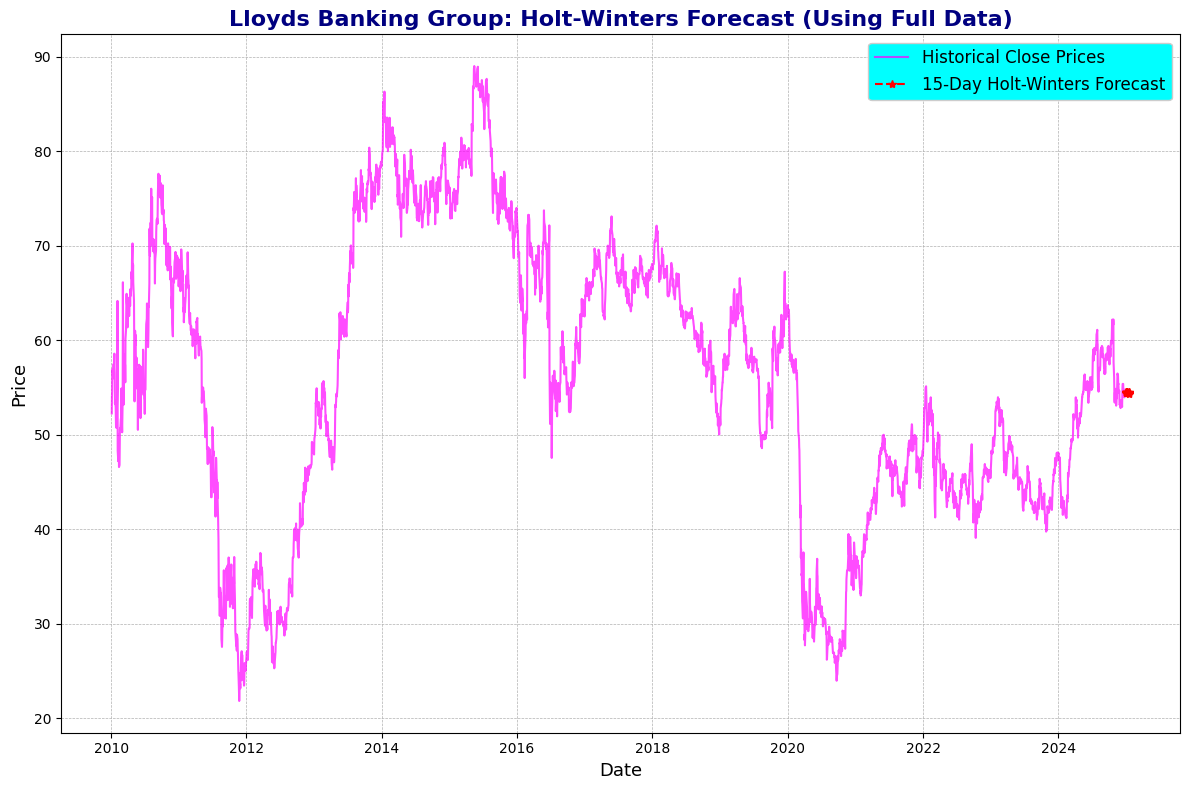

In [34]:
# Forecasting the next 15 business days
forecast_holt_winters = holt_winters_model_fit.forecast(steps=15)

# Create a DataFrame to hold the forecasted values
forecast_dates = pd.date_range(start=data_hw['Date'].max(),
                               periods=16, freq='B')[1:]
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted Close': forecast_holt_winters
})

# Plot historical data and forecast
plt.figure(figsize=(12, 8))
plt.plot(data_hw['Date'], data_hw['Close'], label='Historical Close Prices',
         color='magenta', alpha=0.7)
plt.plot(forecast_df['Date'], forecast_df['Forecasted Close'], color='red',
         label='15-Day Holt-Winters Forecast', linestyle='--', marker='*')
plt.title('Lloyds Banking Group: Holt-Winters Forecast (Using Full Data)',
          fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=13, color='k')
plt.ylabel('Price', fontsize=13, color='k')
legend = plt.legend(frameon=True, loc='upper right', fontsize=12)
frame = legend.get_frame()
frame.set_facecolor('cyan')
frame.set_alpha(1)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

##4.2.1 Forecasted Graph using HOLT - WINTERS Model

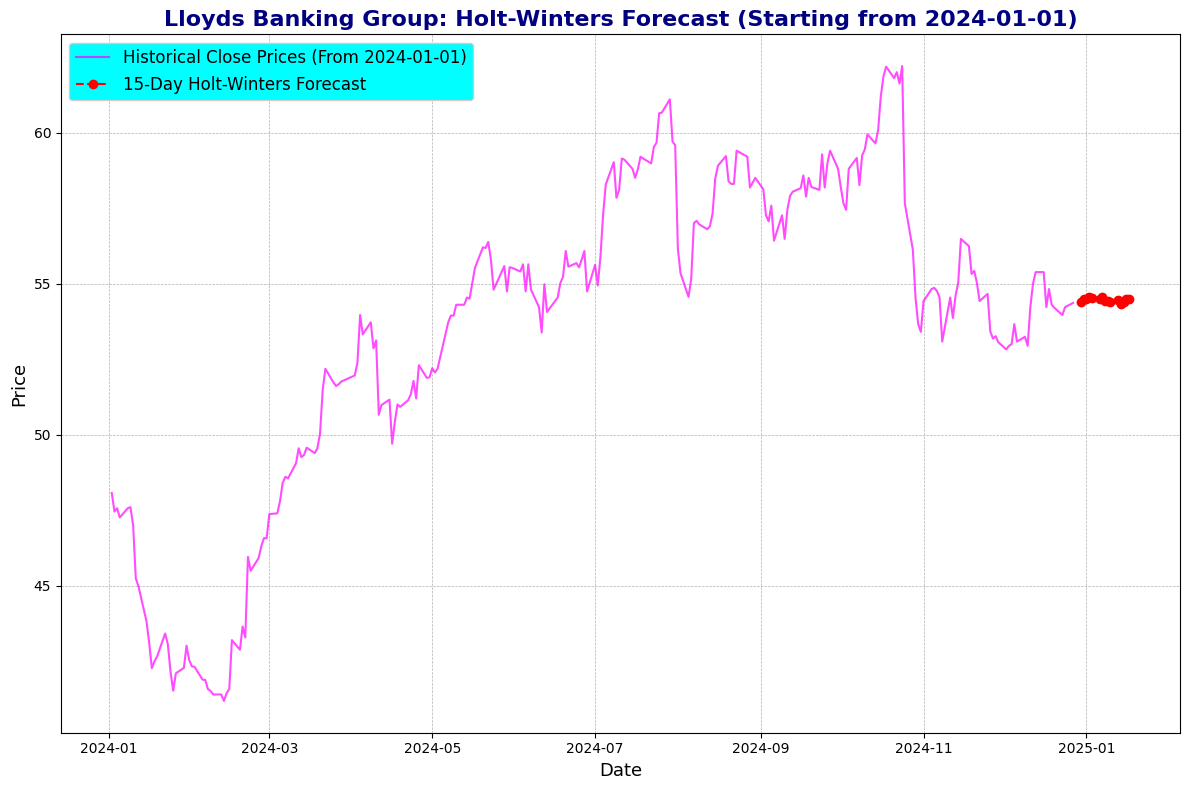

In [35]:
# Ensure 'Date' is in datetime format and set it as the index
data_hw['Date'] = pd.to_datetime(data_hw['Date'], errors='coerce')
data_hw.set_index('Date', inplace=True)

# Filter historical data from January 1, 2024
filtered_df = data_hw[data_hw.index >= '2024-01-01']

# Plot filtered historical data and forecast starting from January 1, 2024
plt.figure(figsize=(12, 8))
plt.plot(filtered_df.index, filtered_df['Close'], alpha=0.7,
         label='Historical Close Prices (From 2024-01-01)', color='magenta')
plt.plot(forecast_df['Date'], forecast_df['Forecasted Close'], color='red',
         label='15-Day Holt-Winters Forecast', linestyle='--', marker='o')
plt.title('Lloyds Banking Group: Holt-Winters Forecast (Starting from 2024-01-01)',
          fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=13, color='k')
plt.ylabel('Price', fontsize=13, color='k')
legend = plt.legend(frameon=True, loc='upper left', fontsize=12)
frame = legend.get_frame()
frame.set_facecolor('cyan')
frame.set_alpha(1)
frame = legend.get_frame()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


## 4.3 Evaluation Metrices

In [36]:
original_values = data_hw['Close']
predicted_hw_values = forecast_df['Forecasted Close']

# Calculating evaluation metrics
mse = mean_squared_error(original_values[-15:], predicted_hw_values)
rmse = math.sqrt(mse)
mae = mean_absolute_error(original_values[-15:], predicted_hw_values)
r2 = r2_score(original_values[-15:], predicted_hw_values)

mape = np.mean(np.abs((original_values[-15:] - predicted_hw_values) \
                      / original_values[-15:])) * 100
# Print the evaluation metrics
print("Test Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Test Evaluation Metrics:
Mean Squared Error (MSE): 0.6116
Root Mean Squared Error (RMSE): 0.7820
Mean Absolute Error (MAE): 0.6241
R-squared (R²): -0.1526
Mean Absolute Percentage Error (MAPE): nan%
